In [1]:
import pandas as pd
import numpy as np

In [2]:
#string
obj = pd.Series(["Pakistan","India","USA"])
obj#mostly dtpye is object for str

0    Pakistan
1       India
2         USA
dtype: object

In [3]:
marks = pd.Series([54,64,67,66],index=["Math","Bio","DLD","CP"])
marks

Math    54
Bio     64
DLD     67
CP      66
dtype: int64

In [4]:
#series using dict
goals = {
    "Messi":857,
    "Ronaldo":952,
    "Pele":776,
    "Dinho":203
}
goals_by_players = pd.Series(goals)
goals_by_players
#keys --> index and value --> value

Messi      857
Ronaldo    952
Pele       776
Dinho      203
dtype: int64

The name of a Series becomes its index or column name if it is used to form a DataFrame. It is also used whenever displaying the Series using the interpreter.

In [5]:
#size-->attribute
#tells how many items are there in series
goals_by_players.size

4

In [6]:
#dtype-->attribute
goals_by_players.dtype


dtype('int64')

In [7]:
#name-->attribute
goals_by_players.name = "Scorers"
goals_by_players.name

'Scorers'

In [8]:
#is_unique-->attribute
pd.Series([1,2,1,2]).is_unique

False

In [9]:
#index
goals_by_players.index

Index(['Messi', 'Ronaldo', 'Pele', 'Dinho'], dtype='object')

In [10]:
pd.Series([1,2,1,2]).index

RangeIndex(start=0, stop=4, step=1)

In [11]:
goals_by_players.values #returns numpy array

array([857, 952, 776, 203], dtype=int64)

Whenever read_csv function gets the data , gets it in the form of dataframe not series

### with one column

In [12]:
#with one column
obj = pd.read_csv("01/subs.csv")
type(obj)
obj

,Subscribers gained
0,48
1,57
2,40
3,43
4,44
...,...
360,231
361,226
362,155
363,144


to convert it into we use squeeze function of read_csv. This will convert the DataFrame into a Series only if the CSV file contains a single column. Otherwise, it remains a DataFrame.

In [13]:
subs = pd.read_csv("01/subs.csv").squeeze("columns")
type(obj)

pandas.core.frame.DataFrame

In [14]:
subs

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

### with multiple column

here index_col attribute makes the column "match_no into index"

In [167]:
runs = pd.read_csv("01/kohli_ipl.csv",index_col="match_no").squeeze("columns")
runs.tail()

match_no
211     0
212    20
213    73
214    25
215     7
Name: runs, dtype: int64

Others ways to do it with not just 2 columns but multiple columns

In [16]:
# obj = pd.read_csv("01/subs.csv", usecols=["column_name"]).squeeze()
# df = pd.read_csv("01/subs.csv")
# obj = df.iloc[:, 0]  # Extract the first column as a Series

In [17]:
movies = pd.read_csv("01/bollywood.csv",index_col="movie").squeeze("columns")
movies.head()

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
Name: lead, dtype: object

name will alawys be the column of the value

### sample

It randoming pick a row item us

In [18]:
movies.sample() #default --> 1

movie
Dil Diya Hai    Emraan Hashmi
Name: lead, dtype: object

In [19]:
movies.sample(3)

movie
Bumm Bumm Bole             Atul Kulkarni
Bombay Talkies (film)       Rani Mukerji
Setters (film)           Shreyas Talpade
Name: lead, dtype: object

### value_counts

tells the frequency of a item in descending

In [20]:
movies.value_counts()

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
                    ..
Diganth              1
Parveen Kaur         1
Seema Azmi           1
Akanksha Puri        1
Edwin Fernandes      1
Name: count, Length: 566, dtype: int64

### sort_values

sort the obj in ascending value

In [21]:
runs.sort_values()

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

In [22]:
runs.sort_values(ascending=False).head(1).values[0] # to tell the highest score

113

sort_values make temporary changes not permenant,inplcae could be used to sort permenantly

In [23]:
runs = runs.copy()
runs.sort_values(inplace=True)
runs

match_no
87       0
211      0
207      0
206      0
91       0
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

In [24]:
runs.head()

match_no
87     0
211    0
207    0
206    0
91     0
Name: runs, dtype: int64

### sort_index

sort the index in ascending order

In [25]:
movies.sort_index()

movie
1920 (film)                   Rajniesh Duggall
1920: London                     Sharman Joshi
1920: The Evil Returns             Vicky Ahuja
1971 (2007 film)                Manoj Bajpayee
2 States (2014 film)              Arjun Kapoor
                                   ...        
Zindagi 50-50                      Veena Malik
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi Tere Naam           Mithun Chakraborty
Zokkomon                       Darsheel Safary
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Name: lead, Length: 1500, dtype: object

In [26]:
movies.sort_index(inplace=True,ascending=False)
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [27]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

## Series Math Methods

### count

returns the count of non-missing values

In [28]:
runs.count()

215

### sum

In [29]:
subs.sum()

49510

### product

In [30]:
subs.product()

0

### mean,median,mode,std,var

In [31]:
subs.mean()

135.64383561643837

In [32]:
runs.median()

24.0

In [33]:
movies.mode() #returns most frequenct value

0    Akshay Kumar
Name: lead, dtype: object

In [34]:
runs.std()

26.22980132830278

In [35]:
runs.var() #variance

688.0024777222343

### min/max

In [36]:
subs.min()

33

In [37]:
subs.max()

396

### describe

gives summary

In [38]:
runs.describe()

count    215.000000
mean      30.855814
std       26.229801
min        0.000000
25%        9.000000
50%       24.000000
75%       48.000000
max      113.000000
Name: runs, dtype: float64

In [39]:
subs.describe()

count    365.000000
mean     135.643836
std       62.675023
min       33.000000
25%       88.000000
50%      123.000000
75%      177.000000
max      396.000000
Name: Subscribers gained, dtype: float64

In [40]:
#Fancing Indexing
runs[[1,3,5,7,2]]

match_no
1     1
3    13
5     1
7    34
2    23
Name: runs, dtype: int64

In [41]:
marks

Math    54
Bio     64
DLD     67
CP      66
dtype: int64

In [42]:
marks[1:3] = 100
marks

Math     54
Bio     100
DLD     100
CP       66
dtype: int64

In [43]:
# Fancy Index Editing
marks.iloc[[0,3]] = [8,65]
marks

Math      8
Bio     100
DLD     100
CP       65
dtype: int64

## Series with Python functionalities

### len/sorted/type/dir/sorted/min/max

In [44]:
print(len(subs))

365


In [45]:
print(type(subs))

<class 'pandas.core.series.Series'>


In [47]:
print(dir(subs)) #tells the attribue and functions

['T', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__bool__', '__class__', '__column_consortium_standard__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pandas_priority__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfl

In [48]:
print(sorted(subs)) #saves in the form of list

[33, 33, 35, 37, 39, 40, 40, 40, 40, 42, 42, 43, 44, 44, 44, 45, 46, 46, 48, 49, 49, 49, 49, 50, 50, 50, 51, 54, 56, 56, 56, 56, 57, 61, 62, 64, 65, 65, 66, 66, 66, 66, 67, 68, 70, 70, 70, 71, 71, 72, 72, 72, 72, 72, 73, 74, 74, 75, 76, 76, 76, 76, 77, 77, 78, 78, 78, 79, 79, 80, 80, 80, 81, 81, 82, 82, 83, 83, 83, 84, 84, 84, 85, 86, 86, 86, 87, 87, 87, 87, 88, 88, 88, 88, 88, 89, 89, 89, 90, 90, 90, 90, 91, 92, 92, 92, 93, 93, 93, 93, 95, 95, 96, 96, 96, 96, 97, 97, 98, 98, 99, 99, 100, 100, 100, 101, 101, 101, 102, 102, 103, 103, 104, 104, 104, 105, 105, 105, 105, 105, 105, 105, 105, 105, 108, 108, 108, 108, 108, 108, 109, 109, 110, 110, 110, 111, 111, 112, 113, 113, 113, 114, 114, 114, 114, 115, 115, 115, 115, 117, 117, 117, 118, 118, 119, 119, 119, 119, 120, 122, 123, 123, 123, 123, 123, 124, 125, 126, 127, 128, 128, 129, 130, 131, 131, 132, 132, 134, 134, 134, 135, 135, 136, 136, 136, 137, 138, 138, 138, 139, 140, 144, 145, 146, 146, 146, 146, 147, 149, 150, 150, 150, 150, 151, 1

In [50]:
print(min(subs))

33


In [51]:
print(max(subs))

396


### Type Conversions

In [53]:
marks

Math      8
Bio     100
DLD     100
CP       65
dtype: int64

In [54]:
list(marks)

[8, 100, 100, 65]

In [55]:
dict(marks)

{'Math': 8, 'Bio': 100, 'DLD': 100, 'CP': 65}

### Membership operator

here, in ,not in also works

In [56]:
movies

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
2 States (2014 film)              Arjun Kapoor
1971 (2007 film)                Manoj Bajpayee
1920: The Evil Returns             Vicky Ahuja
1920: London                     Sharman Joshi
1920 (film)                   Rajniesh Duggall
Name: lead, Length: 1500, dtype: object

In [60]:
'1971 (2007 film)' in movies

True

index operator works on only index

In [61]:
'Alia Bhatt' in movies.values

True

### looping

In loops, values is printed 

for i in movies:
    print(i)

### Boolean Indexing

In [63]:
runs[runs>=50].size

50

In [67]:
runs[runs==0].size

9

In [69]:
subs[subs>200].size

59

In [84]:
num_movies = movies.value_counts()
num_movies[num_movies > 20]

lead
Akshay Kumar        48
Amitabh Bachchan    45
Ajay Devgn          38
Salman Khan         31
Sanjay Dutt         26
Shah Rukh Khan      22
Emraan Hashmi       21
Name: count, dtype: int64

<Axes: >

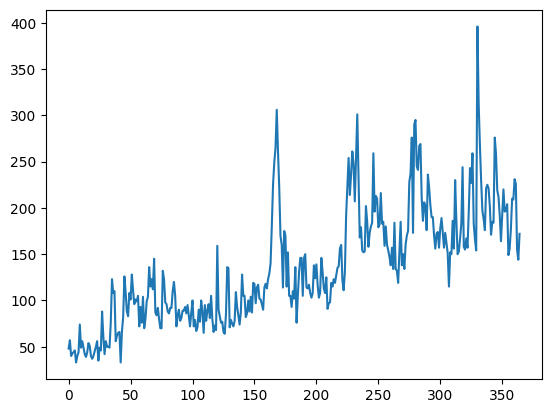

In [85]:
subs.plot()

<Axes: xlabel='lead'>

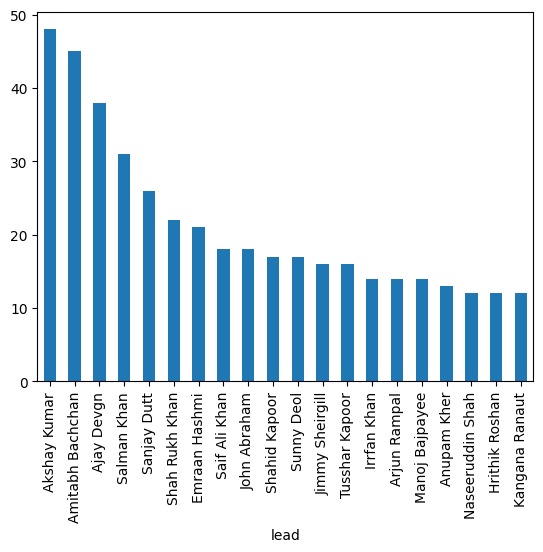

In [86]:
movies.value_counts().head(20).plot(kind="bar")

<Axes: ylabel='count'>

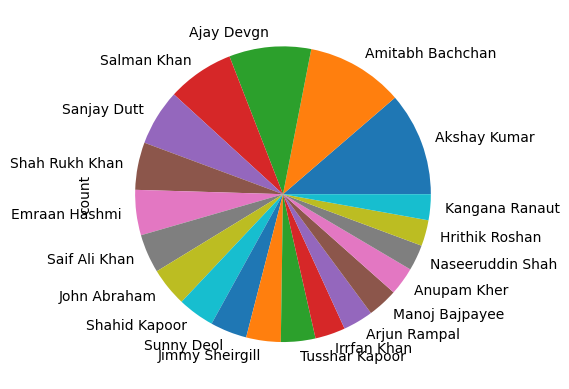

In [87]:
movies.value_counts().head(20).plot(kind="pie")

## Some important methods

### astype

In [90]:
import sys
sys.getsizeof(runs)

11768

astype could be to reduce the size of data

In [98]:
sys.getsizeof(runs.astype("int16"))

10478

### between 

In [102]:
runs[runs.between(51,99)].size #both inputs are inclusive

43

### clip

In Pandas, clip() is used to limit values in a Series or DataFrame.

In [103]:
runs.clip(100,200)

match_no
87     100
211    100
207    100
206    100
91     100
      ... 
164    100
120    100
123    108
126    109
128    113
Name: runs, Length: 215, dtype: int64

### drop_duplicates

In [117]:
ser = pd.Series([1,1,2,2,2,3,4,4,])
ser


0    1
1    1
2    2
3    2
4    2
5    3
6    4
7    4
dtype: int64

In [107]:
ser.drop_duplicates() #by default,it deletes every expect first occurance

0    1
2    2
5    3
6    4
dtype: int64

keep attribute could be used to delete first

In [108]:
ser.drop_duplicates(keep="last")

1    1
4    2
5    3
7    4
dtype: int64

In [109]:
movies.drop_duplicates()

movie
Zor Lagaa Ke...Haiya!            Meghan Jadhav
Zokkomon                       Darsheel Safary
Zindagi Tere Naam           Mithun Chakraborty
Zindagi Na Milegi Dobara        Hrithik Roshan
Zindagi 50-50                      Veena Malik
                                   ...        
68 Pages                         Mouli Ganguly
5 Weddings                       Nargis Fakhri
404 (film)                          Sara Arjun
3 Storeys                          Aisha Ahmed
3 A.M. (2014 film)               Salil Acharya
Name: lead, Length: 566, dtype: object

as we can see size goes from 1500 to 566

### duplicated

The duplicated() function is mainly used in pandas to identify duplicate values in a Series or DataFrame. It returns a Boolean Series where True indicates that a row or value is a duplicate of a previous occurrence.

In [118]:
ser.duplicated()

0    False
1     True
2    False
3     True
4     True
5    False
6    False
7     True
dtype: bool

In [120]:
ser.duplicated().sum()  #to tell how many unique values are there

4

In [121]:
runs.duplicated().sum()

137

In [132]:
nser = pd.Series([1,2,3,np.nan,5,np.nan,np.nan,8,9,np.nan,11,12])
nser

0      1.0
1      2.0
2      3.0
3      NaN
4      5.0
5      NaN
6      NaN
7      8.0
8      9.0
9      NaN
10    11.0
11    12.0
dtype: float64

In [133]:
nser.count() 

8

In [134]:
nser.size

12

### isnull

The isnull() function in pandas is used to detect missing (NaN) values in a Series or DataFrame. It returns a Boolean mask where True indicates missing values.

In [135]:
nser.isnull()

0     False
1     False
2     False
3      True
4     False
5      True
6      True
7     False
8     False
9      True
10    False
11    False
dtype: bool

In [136]:
nser.isnull().sum()

4

### dropna

In [137]:
nser.dropna()

0      1.0
1      2.0
2      3.0
4      5.0
7      8.0
8      9.0
10    11.0
11    12.0
dtype: float64

### fillna

In [142]:
nser.fillna(0)

0      1.0
1      2.0
2      3.0
3      0.0
4      5.0
5      0.0
6      0.0
7      8.0
8      9.0
9      0.0
10    11.0
11    12.0
dtype: float64

In [145]:
nser.fillna(nser.mean())

0      1.000
1      2.000
2      3.000
3      6.375
4      5.000
5      6.375
6      6.375
7      8.000
8      9.000
9      6.375
10    11.000
11    12.000
dtype: float64

### isin

In [149]:
runs[(runs==49) | (runs==99)]

match_no
86    49
82    99
Name: runs, dtype: int64

In [151]:
runs[runs.isin([49,99])]

match_no
86    49
82    99
Name: runs, dtype: int64

### apply

The apply() function in pandas is used to apply a function to rows or columns of a DataFrame or elements of a Series. It is useful for transforming data efficiently.



In [ ]:
movies.apply(lambda name:name.split()[0].upper())

In [162]:
def checker(x):
    if x > subs.mean():
        return "Good"
    return "Bad"
subs.apply(checker)

0       Bad
1       Bad
2       Bad
3       Bad
4       Bad
       ... 
360    Good
361    Good
362    Good
363    Good
364    Good
Name: Subscribers gained, Length: 365, dtype: object

### copy

The copy() function in pandas is used to create a duplicate of a Series or DataFrame. It ensures that changes to the new object do not affect the original one.



In [169]:
runs[1] = 100
runs

match_no
1      100
2       23
3       13
4       12
5        1
      ... 
211      0
212     20
213     73
214     25
215      7
Name: runs, Length: 215, dtype: int64

In [176]:
new = runs.head()
runs

match_no
1      100
2       23
3       13
4       12
5        1
      ... 
211      0
212     20
213     73
214     25
215      7
Name: runs, Length: 215, dtype: int64

In [178]:
runs[1] = 1

thats why we use copy because head doesnt make copy and make changes in the original one

In pandas, when you access or modify data, you may either get a view (a reference to the original data) or a copy (a new independent object). Understanding the difference helps avoid unexpected modifications.

In [180]:
new = runs.head().copy()
new[1] = 100
new

match_no
1    100
2     23
3     13
4     12
5      1
Name: runs, dtype: int64

In [181]:
runs.head()

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

here,as we can see copy doesnt affect the original series